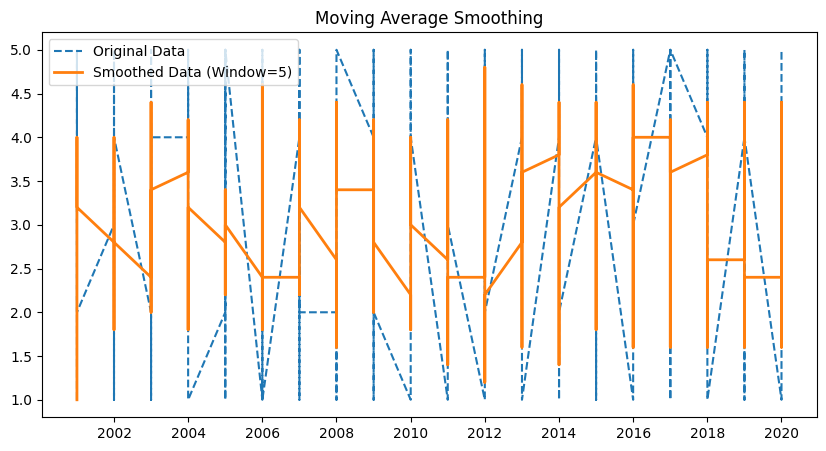

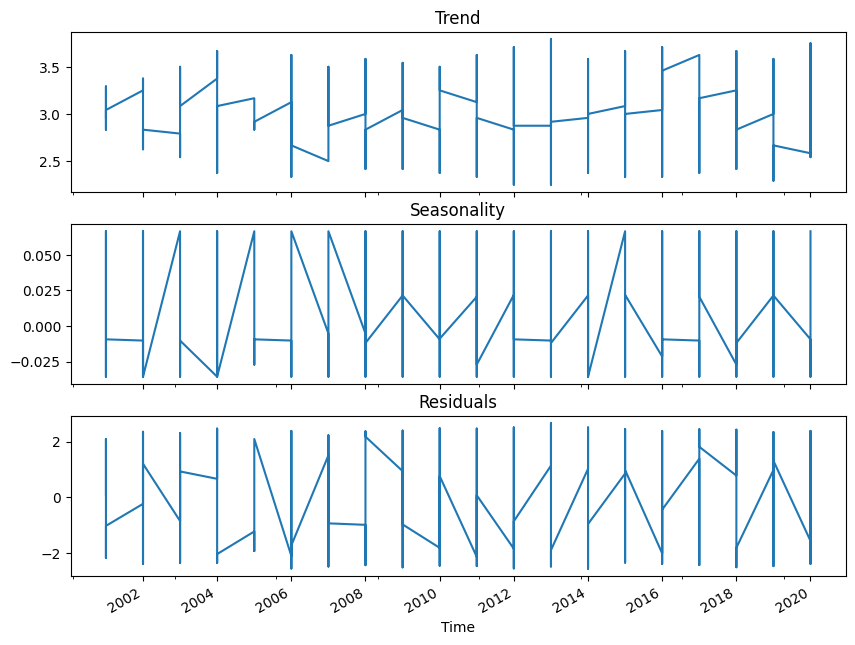

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def moving_average_smoothing(data, window_size):
    """
    Apply moving average smoothing to the data.

    Parameters:
    data (pd.Series): Time series data.
    window_size (int): The size of the moving average window.

    Returns:
    pd.Series: Smoothed data.
    """
    return data.rolling(window=window_size, min_periods=1).mean()

def decompose_time_series(data, period):
    """
    Decompose time series data into trend, seasonality, and residuals.

    Parameters:
    data (pd.Series): Time series data.
    period (int): The seasonal period.

    Returns:
    Decomposition object containing trend, seasonal, and residual components.
    """
    return seasonal_decompose(data, period=period, model='additive')

# Example usage
if __name__ == "__main__":
    # Generate sample time series data
    df = pd.read_csv("/content/trends.csv")  # Replace with your file path

# Ensure 'year' is in datetime format if needed
    df['year'] = pd.to_datetime(df['year'], format='%Y')

# Sort values by year
    df = df.sort_values(by='year')

# Use 'rank' column for time series analysis
    time_series_data = df.set_index('year')['rank']

    # Define moving average window size
    window_size = 5

    # Apply moving average smoothing
    smoothed_data = moving_average_smoothing(time_series_data, window_size)

    # Decompose time series
    period = 12  # Define the seasonality period
    decomposition = decompose_time_series(time_series_data, period)

    # Plot original vs smoothed data
    plt.figure(figsize=(10, 5))
    plt.plot(time_series_data, label='Original Data', linestyle='dashed')
    plt.plot(smoothed_data, label=f'Smoothed Data (Window={window_size})', linewidth=2)
    plt.legend()
    plt.title('Moving Average Smoothing')
    plt.show()

    # Plot decomposition results
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    decomposition.trend.plot(ax=axes[0], title='Trend')
    decomposition.seasonal.plot(ax=axes[1], title='Seasonality')
    decomposition.resid.plot(ax=axes[2], title='Residuals')
    plt.xlabel("Time")
    plt.show()
